# 7_export_thalamus_data_for_cirrocumulus

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns

from thalamus_merfish_analysis import abc_to_cirro as a2c

get_ipython().run_line_magic('matplotlib', 'inline')

## Export thalamus dataset as cirro-compatible h5ad file

In [28]:
adata = a2c.export_h5ad_for_cirro()

Loading thalamus subset from ABC Atlas ...
Generating spatial coordinates for Cirrocumulus...


/opt/conda/lib/python3.9/site-packages/anndata/_core/anndata.py:859: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._set_dim_df(value, "obs")


Adding color palettes for Cirrocumulus...
Calculating low-dimensional embeddings ... This may take 10-15 minutes.


/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Generating UMAP embedding. This may take 1-2 minutes ...
Generating tSNE embedding. This may take approx. 10 minutes ...
Adding unsupervised machine learning results


## What can I visualize in Cirrocumulus?

Below are examples of a few types of data you can visualize in Cirrocumulus (or `seaborn`) using this h5ad file.

- 2D montage view of coronal sections
- 3D CCF view of the sections
- Unsupervised machine learning results
- Low-dimensional embedding views (UMAP, tSNE)
- neurotransmitter, class, subclass, & supertype cell assignments in the official ABC color palette [examples not shown]
- cluster cell assignments in a custom, high-contrast color palette [example not shown]

### Montage of thalamic sections

xy,section coordinates are transformed to montage coordinates so all sections 
can be displayed on a 2D screen via the Cirrocumulus package

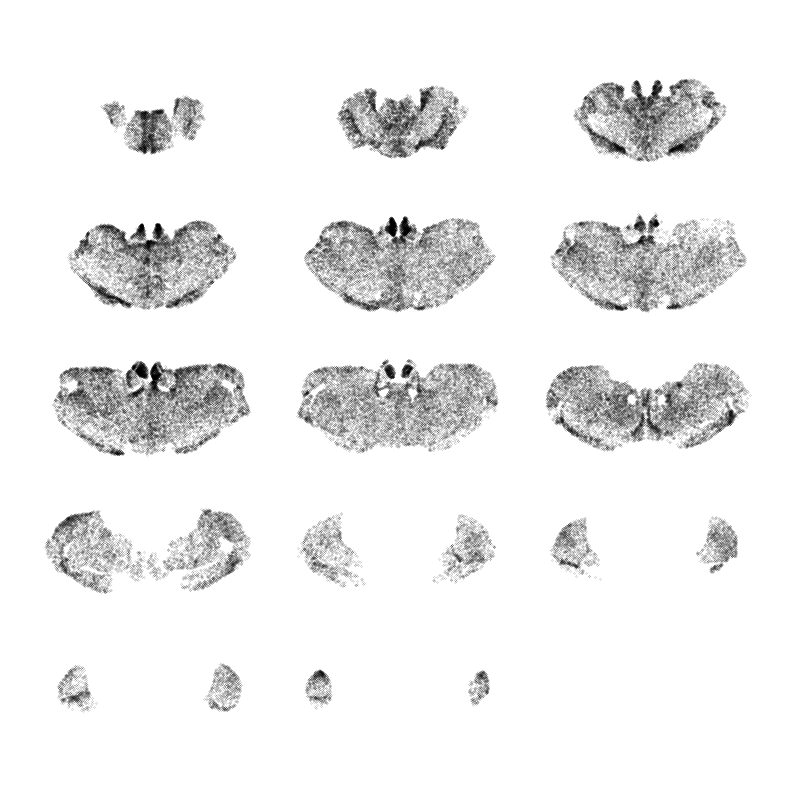

In [47]:
# xy,section coordinates are transformed to montage coordinates so all sections 
# can be displayed on a 2D screen via the Cirrocumulus package
fig = plt.figure(figsize=(10,10))
plt.scatter(adata.obsm['cirro_spatial'][:,0], 
            adata.obsm['cirro_spatial'][:,1], 
            s=0.01, 
            c='k')
plt.axis('equal')
plt.axis('off')
plt.show()

### 3D CCF spatial coordinates view

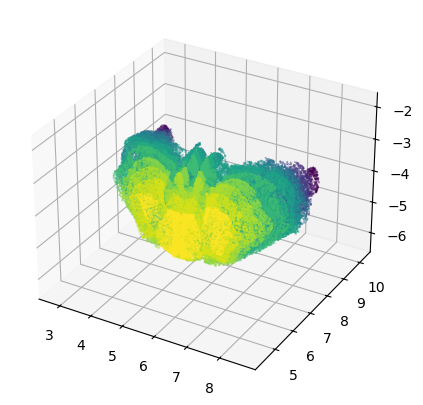

In [48]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(adata.obsm['ccf_spatial_3d'][:,2], 
           adata.obsm['ccf_spatial_3d'][:,0], 
           adata.obsm['ccf_spatial_3d'][:,1], 
            s=0.1,
            c=adata.obs['z_section'])
ax.axis('equal')
plt.show()

### Unsupervised machine learning results

The results from running SpaGCN (domain detection) and NSF (non-negative spatial 
factorization) are included in the h5ad and can be visualized in Cirrocumulus 
like any other cell metadata.

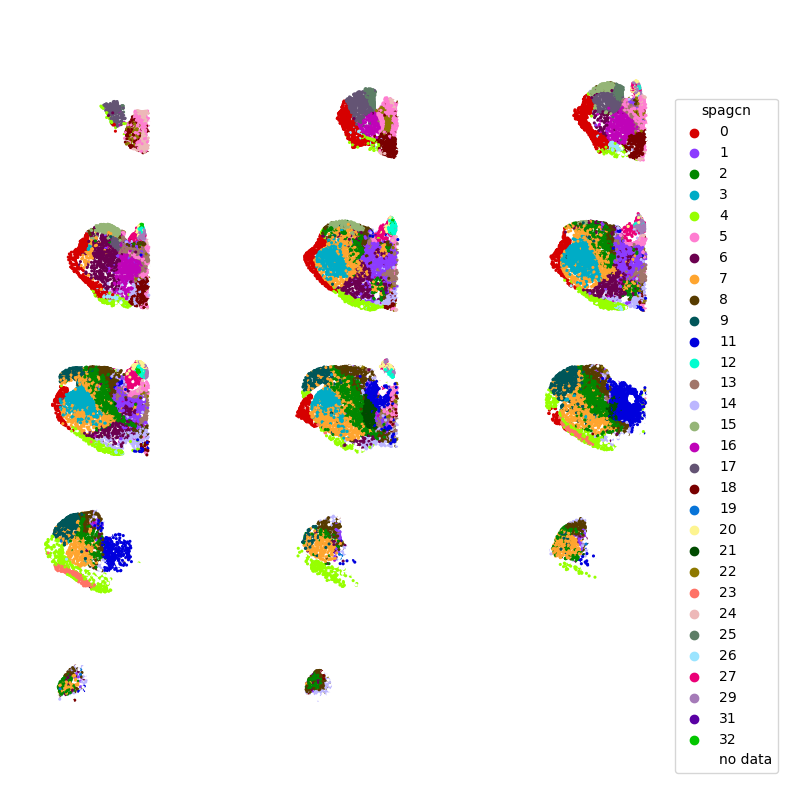

In [53]:
# SpaGCN domain example results have been saved to adata.obs
spagcn_palette = dict(zip(adata.obs['spagcn'].cat.categories, adata.uns['spagcn_colors']))
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
sns.scatterplot(adata.obs, 
                ax=ax, 
                x='x_cirro', 
                y='y_cirro', 
                hue='spagcn', 
                palette=spagcn_palette, 
                s=5, 
                linewidth=0, 
                legend=True)
ax.axis('equal')
ax.axis('off')
plt.show()

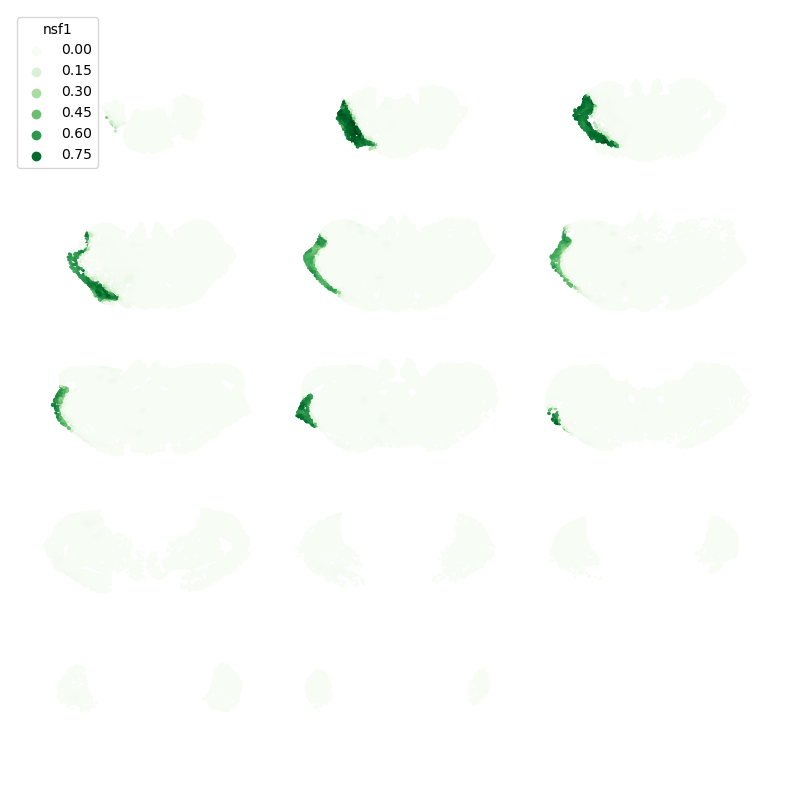

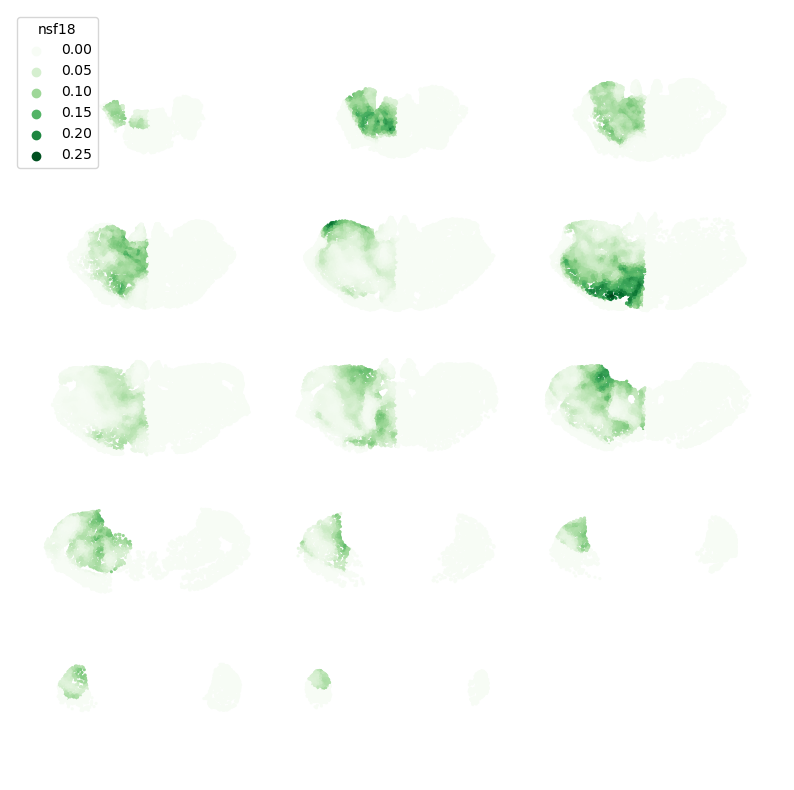

In [54]:
# NSF results have been saved to adata.obs and can be viewed in Cirrocumulus
example_patterns = ['nsf1', 'nsf18']
for i in range(len(example_patterns)):
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca()
    sns.scatterplot(adata.obs, 
                    ax=ax, 
                    x='x_cirro', 
                    y='y_cirro', 
                    hue=example_patterns[i],
                    palette='Greens',
                    s=5, 
                    linewidth=0, 
                    legend=True)
    ax.axis('equal')
    ax.axis('off')

### Low-dimensional embeddings (UMAP, tSNE)

As part of the h5ad file creation, UMAP and tSNE embeddings are calculated using
scanpy's built-in functions. The data can be viewed in these low-dimensional
embedding spaces as an alternative to the experiments spatial coordinates.

/opt/conda/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


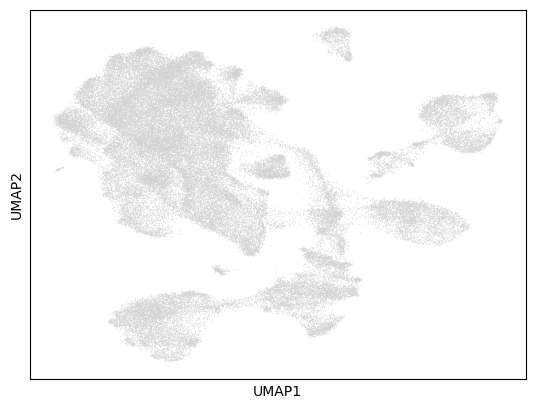

/opt/conda/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


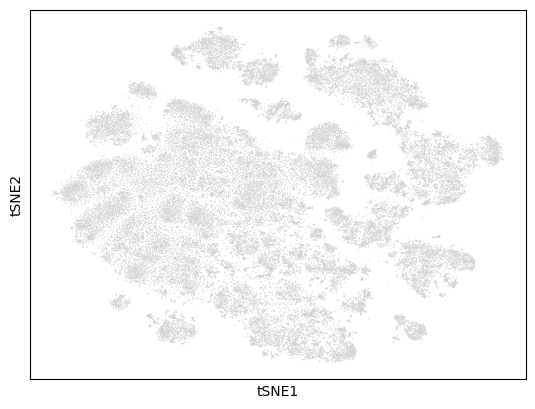

In [57]:
sc.pl.umap(adata)
sc.pl.tsne(adata)